# Regresión lineal múltiple
#### Estadística 2
##### Por: Jorge Iván Reyes Hernández

Recordemos que uno de los objetivos del análisis de regresión es __describir y explicar relaciones entre variable__. En la regresión simple buscamos explicar una variable (generalmente denotada por $Y$) a través de una única variable independiente o regresora (generalmente denotada por $X$). En la regresión múltiple buscamos explicar una variable, $Y$ a través de múltiples regresores, $X_1, \ldots, X_k$.

En general, el modelo de regresión es
$$
Y = f(X_1,\ldots,X_k) + \epsilon
$$

## 1. Formulación del modelo

El primer paso en el análisis de regresión es la formulación del modelo. 
Aquí debemos:
1. Seleccionar las variables ($X_1,\ldots,X_k$).

    Debe haber un balance entre la simplicidad del modelo (forma de la $f$) y la complejidad (qué tantas variables usar).
    
2. Especificar la forma funcional del modelo ($f$).
    
    En regresión lineal, $f$ es una función lineal (de los parámetros):
    
    $$
    Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_k X_k + \epsilon
    $$
    
3. Hacer suposiciones acerca del error aleatorio ($\epsilon$).

    $$
        \epsilon \sim \mathcal{N}(0,\sigma^{2})
    $$
    

Para ilustrar lo anterior, considere los siguientes datos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats


In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
data = pd.read_csv("data_sales.csv")


In [4]:
data


,Periodo (por 3 meses),Ventas (en miles de unidades),Publicidad (en miles de euros),Precio (euros por unidad),Difusión (en miles de euros)
0,1,2596,203,1.42,150
1,2,2709,216,1.41,120
2,3,2552,207,1.95,146
3,4,3004,250,1.99,270
4,5,3076,240,1.63,200
5,6,2513,226,1.82,93
6,7,2626,246,1.69,70
7,8,3120,250,1.65,230
8,9,2751,235,1.99,166
9,10,2965,256,1.53,116


Intuitivamente podemos pensar que mientras más se invierta en publicidad, mayores serán las ventas. Si $Y$ indica las ventas, entonces podríamos interesarnos por explicar cómo varían las ventas esperadas conforme varía el gasto en publicidad.

$$
    \mathbb{E}(Y|X) = f(X_1)
$$

Si asumimos que $f(X_1) = \beta_0 + \beta_1 X_1$, obtenemos el modelo de regresión lineal simple.

In [5]:
Y = data["Ventas (en miles de unidades)"]


In [6]:
X_1 = data["Publicidad (en miles de euros)"]


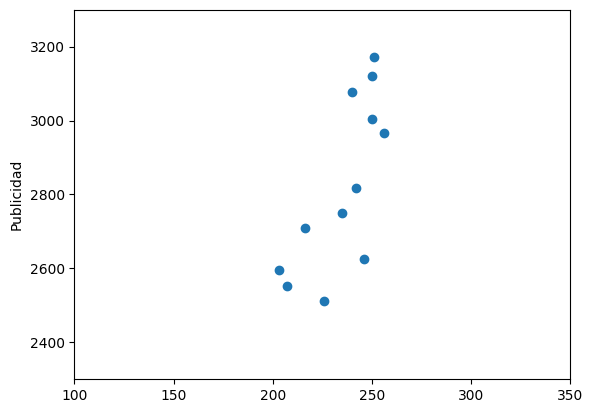

In [7]:
plt.ylabel("Ventas")
plt.ylabel("Publicidad")
plt.xlim([100,350])
plt.ylim([2300,3300])
plt.scatter(X_1, Y);


In [8]:
# Pearson correlation coefficient and p-value for testing non-correlation.

stats.pearsonr(X_1, Y)


PearsonRResult(statistic=0.7424104360176366, pvalue=0.005685256582679216)

El coeficiente de correlación de Pearson confirma que existe asociación lineal entre las ventas ($Y$) y la publicidad ($X_1$).

## 2. Estimación de la función de regresión

Como hay correlación entre las variables, tiene sentido ajustar un modelo de regresión lineal.

In [9]:
results_1 = sm.OLS(Y, sm.add_constant(X_1)).fit()


In [10]:
results_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Ventas (en miles de unidades)   R-squared:                       0.551
Model:                                       OLS   Adj. R-squared:                  0.506
Method:                            Least Squares   F-statistic:                     12.28
Date:                           Mon, 01 May 2023   Prob (F-statistic):            0.00569
Time:                                   16:04:42   Log-Likelihood:                -77.182
No. Observations:                             12   AIC:                             158.4
Df Residuals:                                 10   BIC:                             159.3
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            560.4884    647.974      0.865      0.407    -883.289    2004.265
Publicidad (en miles de euros)     9.6297      2.748      3.504      0.006       3.507      15.753
==============================================================================
Omnibus:                        0.835   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.659   Jarque-Bera (JB):                0.650
Skew:                          -0.489   Prob(JB):                        0.722
Kurtosis:                       2.414   Cond. No.                     3.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Del resumen anterior podemos notar que
$$
    \hat{Y} = 560.49 + 9.63 X_1
$$

La interpretación del coeficiente asociado a $X_1$ (la publicidad) es que si incrementamos en una unidad $X_1$ (i.e, en un euro el gasto en publicidad), entonces se espera que las ventas aumenten en $9.63$ unidades.

---
__Correlación vs regresión__

Una pregunta natural es: si ya vimos que las ventas ($Y$) y la publicidad ($X_1$) están asociados linealmente (pues el coeficiente de correlación de Pearson es aprox. 0.7), ¿por qué hacer una regresión lineal?

- La correlación (de Pearson) y la regresión son usadas para medir qué tanta relación existe entre variables.
- En análisis de regresión mide el efecto que tiene una variable independiente ($X_i$) en la variable dependiente ($Y$), la correlación no.
- Con el análisis de regresión es posible realizar predicciones.
- En el análisis de regresión se distinguen entre variables dependientes e independientes, $Y$ y $X$, el coeficiente de correlación de Pearson no (pues es simétrico, $r_{XY} = r_{YX}$).
- En el análisis de regresión, la relación causal tiene una dirección:
$$
X \to Y\\
\text{Causa} \to \text{Efecto}
$$
- Correlación no implica causalidad (The phrase "correlation does not imply causation" refers to the inability to legitimately deduce a cause-and-effect relationship between two events or variables solely on the basis of an observed association or correlation between them [Correlation does not imply causation](https://en.wikipedia.org/wiki/Correlation_does_not_imply_causation))

---

Una forma de comparar modelos es a través de la suma de los errores al cuadrado 

$$
SSR = \sum_i (y_i - \hat{y}_i)^{2}
$$

Un modelo con menor $SSR$ (comparado con otro) explica mayor variabilidad en $Y$ usando $X_i$.


In [11]:
SSR_1 = sum(results_1.resid ** 2)
SSR_1


271216.5389327144

Para este modelo $SSR = 271,216$.

Podemos considerar otros modelos usando otra variable regresora para explicar la variabilidad en las ventas.

In [12]:
X_2 = data["Precio (euros por unidad)"]
X_3 = data["Difusión (en miles de euros)"]


In [13]:
results_2 = sm.OLS(Y, sm.add_constant(X_2)).fit()
results_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Ventas (en miles de unidades)   R-squared:                       0.002
Model:                                       OLS   Adj. R-squared:                 -0.098
Method:                            Least Squares   F-statistic:                   0.02267
Date:                           Mon, 01 May 2023   Prob (F-statistic):              0.883
Time:                                   16:04:42   Log-Likelihood:                -81.975
No. Observations:                             12   AIC:                             167.9
Df Residuals:                                 10   BIC:                             168.9
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      2919.8312    633.314      4.610      0.001    1508.719    4330.943
Precio (euros por unidad)   -55.4892    368.571     -0.151      0.883    -876.717     765.738
==============================================================================
Omnibus:                        3.551   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.169   Jarque-Bera (JB):                1.144
Skew:                           0.146   Prob(JB):                        0.564
Kurtosis:                       1.516   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
results_3 = sm.OLS(Y, sm.add_constant(X_3)).fit()
results_3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Ventas (en miles de unidades)   R-squared:                       0.509
Model:                                       OLS   Adj. R-squared:                  0.460
Method:                            Least Squares   F-statistic:                     10.36
Date:                           Mon, 01 May 2023   Prob (F-statistic):            0.00920
Time:                                   16:04:42   Log-Likelihood:                -77.724
No. Observations:                             12   AIC:                             159.4
Df Residuals:                                 10   BIC:                             160.4
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         2400.0668    141.124     17.007      0.000    2085.623    2714.511
Difusión (en miles de euros)     2.7172      0.844      3.218      0.009       0.836       4.599
==============================================================================
Omnibus:                        2.060   Durbin-Watson:                   1.525
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                0.891
Skew:                          -0.041   Prob(JB):                        0.641
Kurtosis:                       1.668   Cond. No.                         474.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

De donde

$$
    \hat{Y} = 560 + 9.63 X_1 \\
    \hat{Y} = 2920 - 55.5 X_2 \\
    \hat{Y} = 2400 + 2.72 X_3
$$

con $X_1$: publicidad, $X_2$: precio, $X_3$: difusión.

El problema con hacer esto es que, dados los valores de los regresores, cada ecuación da un valor distinto para las ventas estimadas. ¿A cuál le hacemos caso?

La solución es considerar las variables de manera simultánea dentro del modelo (i.e hacer regresión múltiple), por lo que hay que cambiar la forma de $f$.

Como en el caso simple, el primer paso es calcular la matriz de correlación.

In [15]:
corr_mat = data.drop(columns="Periodo (por 3 meses)").corr()


In [16]:
corr_mat


,Ventas (en miles de unidades),Publicidad (en miles de euros),Precio (euros por unidad),Difusión (en miles de euros)
Ventas (en miles de unidades),1.000000,0.742410,-0.047555,0.713270
Publicidad (en miles de euros),0.742410,1.000000,0.155163,0.289812
Precio (euros por unidad),-0.047555,0.155163,1.000000,0.298821
Difusión (en miles de euros),0.713270,0.289812,0.298821,1.000000


De lo anterior podemos notar que:

1. La correación entre las ventas y la publicidad es (aprox) $0.74$.
2. La correación entre las ventas y el precio es (aprox) $-0.048$.
2. La correación entre las ventas y la difusión es (aprox) $0.713$.


Con la información anterior podríamos, por ejemplo, ajustar un modelo considerando las ventas $Y$, la publicidad $X_1$ y el precio $X_2$, o cualquier conbinación de las 3 co-variables.

In [17]:
X_1


0     203
1     216
2     207
3     250
4     240
5     226
6     246
7     250
8     235
9     256
10    242
11    251
Name: Publicidad (en miles de euros), dtype: int64

In [18]:
X_2


0     1.42
1     1.41
2     1.95
3     1.99
4     1.63
5     1.82
6     1.69
7     1.65
8     1.99
9     1.53
10    1.69
11    1.72
Name: Precio (euros por unidad), dtype: float64

In [19]:
X_12 = np.asmatrix([X_1, X_2]).T
X_12.shape


(12, 2)

In [20]:
results_4 = sm.GLS(Y, sm.add_constant(X_12)).fit()
results_4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  GLS Regression Results                                 
=========================================================================================
Dep. Variable:     Ventas (en miles de unidades)   R-squared:                       0.578
Model:                                       GLS   Adj. R-squared:                  0.485
Method:                            Least Squares   F-statistic:                     6.171
Date:                           Mon, 01 May 2023   Prob (F-statistic):             0.0205
Time:                                   16:04:42   Log-Likelihood:                -76.808
No. Observations:                             12   AIC:                             159.6
Df Residuals:                                  9   BIC:                             161.1
Df Model:                                      2                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        813.8182    741.014      1.098      0.301    -862.471    2490.108
x1             9.9654      2.842      3.506      0.007       3.536      16.395
x2          -194.5880    255.669     -0.761      0.466    -772.951     383.775
==============================================================================
Omnibus:                        1.331   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.514   Jarque-Bera (JB):                0.819
Skew:                          -0.605   Prob(JB):                        0.664
Kurtosis:                       2.581   Cond. No.                     3.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

De donde obtenemos que

$$
\hat{Y} = 814 + 9.97 X_1 - 194.6 X_2
$$

1. El modelo ya no es una recta, es un plano.
2. Que el coeficiente de $X_2$ (el precio) sea negativo refleja el hecho de que si el precio aumenta, las ventas (pueden) disminuyen.
3. La magnitud de los coeficientes no está relacionada con la importancia de esa variable al explicar $Y$.

Para poder comparar los coeficientes primero hay que estandarizarlos [Standardized coefficient](https://en.wikipedia.org/wiki/Standardized_coefficient).

$$\beta^{st}_j = \beta_j \frac{s_{x_j}}{s_y}$$

donde $s$ indica desviación estándar.

In [21]:
s_x1 = X_1.std()
s_x1


18.069730255738506

In [22]:
s_x2 = X_2.std()
s_x2


0.20086743706416746

In [23]:
s_y = Y.std()
s_y


234.3809867922246

Los coeficientes estandarizados son

$$
\beta_1^{st} = (9.97) \frac{18.07}{234.38} = 0.768 \\
\beta_2^{st} = (-194.6) \frac{0.201}{234.38} = -0.167 \\
$$

- Los beta's estandarizados son usados como una medida de la importancia de la variables.
- Los beta's estandarizados son los coeficientes de la regresión al ajustar el modelo con las variables estandarizadas.

Podemos observar que la publicidad es más importante, i.e, tiene mayor influencia (al explicar la variabilidad en las ventas) que el precio del producto.

In [24]:
# SSR con publicidad y precio.
SSR_4 = sum(results_4.resid ** 2)
SSR_4


254815.93272616263

Ahora vamos a ajustar el modelo usando las 3 variables explicativas que tenemos.

In [25]:
X_123 = np.asmatrix([X_1, X_2, X_3]).T
X_123.shape


(12, 3)

In [26]:
results_5 = sm.GLS(Y, sm.add_constant(X_123)).fit()
results_5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  GLS Regression Results                                 
=========================================================================================
Dep. Variable:     Ventas (en miles de unidades)   R-squared:                       0.922
Model:                                       GLS   Adj. R-squared:                  0.893
Method:                            Least Squares   F-statistic:                     31.50
Date:                           Mon, 01 May 2023   Prob (F-statistic):           8.84e-05
Time:                                   16:04:42   Log-Likelihood:                -66.686
No. Observations:                             12   AIC:                             141.4
Df Residuals:                                  8   BIC:                             143.3
Df Model:                                      3                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1248.2760    345.981      3.608      0.007     450.443    2046.109
x1             7.9081      1.342      5.891      0.000       4.812      11.004
x2          -387.5722    121.116     -3.200      0.013    -666.867    -108.277
x3             2.4222      0.408      5.935      0.000       1.481       3.363
==============================================================================
Omnibus:                        1.924   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                0.898
Skew:                          -0.160   Prob(JB):                        0.638
Kurtosis:                       1.698   Cond. No.                     4.52e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Podemos ver que

$$
\hat{Y} = 1248 + 7.91 X_1 + -387-6 X_2 + 2.42 X_3
$$

Para medir la importancia de las variables sobre $Y$ hay que calcular las beta's estandarizadas.

$$
\beta_1^{st} = 0.610\\
\beta_2^{st} = -0.332\\
\beta_3^{st} = 0.636
$$

In [27]:
# SSR con todas las variables
SSR_5 = sum(results_5.resid ** 2)
SSR_5


47166.36496770067

Podemos observar que al incluir más variables $SSR$ disminuye:

1. Usando publicidad: $SSR=271,216.53$ 
2. Usando publicidad y precio: $SSR = 254,815.93$
3. Usando publicidad, precio y difusión: $SSR = 47,166.36$.

Como el $SSR$ nos ayuda a comparar modelos, podemos concluir que el tercer modelo explica mejor la variabilidad de las ventas.

## 3. Verificación de la regresión

Una vez ajustado el modelo (i.e, estimados los parámetros), hay que verificar la bondad o calidad del modelo.

Como ya se dijo, para comparar distintos modelos (y determinar cuál es mejor) podemos usar $SSR$. Sin embargo, esta medida no nos ayuda a decidir si un único modelo es bueno o malo, o qué tan bueno o qué tan malo.

Para medir la bondad del ajuste de un modelo podemos usar:

1. Error estándar de la regresión.
2. Coeficiente de determinación.
3. Estadística $F$ y su $p_{\text{val}}$.
4. Coeficiente de determinación ajustado.
---

1. __Error estándar__.

El error estándar mide qué tan cercanas son las observaciones observadas de las esperadas. Se calcula como la desviación estándar de los residuales:

$$
SE = \sqrt{\frac{SSR}{n-k-1}}
$$

$n-k-1$ son los grados de libertad del modelo (i.e número de observaciones menos número de parámetros estimados).

Para nuestros modelos:

In [28]:
# Usando únicamente publicidad
SE_1 = np.sqrt(SSR_1 / (data.shape[0] - 1 - 1 ))
SE_1


164.68653221581732

In [29]:
# Usando publicidad y precio
SE_4 = np.sqrt(SSR_4 / (data.shape[0] - X_12.shape[1] - 1 ))
SE_4


168.2643200860422

In [30]:
# Usando publicidad, precio y difusión
SE_5 = np.sqrt(SSR_5 / (data.shape[0] - X_123.shape[1] - 1 ))
SE_5


76.78408442485059

Lo usual es obtener estos valores normalizados (divididos por $\bar{y}$) y en porcentaje.

In [31]:
(SE_1 / Y.mean()) * 100


5.829439799975835

In [32]:
(SE_4 / Y.mean()) * 100


5.956083422413812

In [33]:
(SE_5 / Y.mean()) * 100


2.7179405123689775

Podemos notar que el modelo 1 (usando publicidad) presenta menor error estándar que el modelo 4 (usando publicidad y precio), por lo que el modelo 1 es mejor, en términos de precisión. El modelo 4 es mejor en términos de que explica más variabilidad total en $Y$ (menor $SST$) que el modelo 1, pero tiene menor precisión (mayor $SE$).

2. __Coeficiente de determinación__

Otra medida de la bondad del ajuste es el _coeficiente de determinación_, $R^2$, definido por

$$
R^{2}(\underline{X},\underline{Y}) = \frac{SSE}{SST} = 1 - \frac{SSR}{SST}, \hspace{0.8cm} 0\leq R^2 \leq 1
$$

con 

$SST = \sum (y_i - \bar{y})^{2}$: Variación total

$SSE = \sum (\hat{y}_i - \bar{y})^{2}$: Variación explicada por el modelo

$SSR = \sum (y_i - \hat{y}_i)^{2}$: Variación que no es explicada por el modelo

Para el modelo de regresión lineal simple, también se puede calcular como la correlación entre $Y$ y $X$ al cuadrado,

$$
R^{2} = r_{YX}^{2}
$$

Para el modelo de regresión múltiple, también se puede calcular como la correlación entre $Y$ e $\hat{Y}$ al cuadrado,

$$
R^{2} = r_{Y\hat{Y}}^{2}
$$

En este caso, $r_{Y\hat{Y}}$ es llamada _correlación múltiple_.

##### Interpretación

El coeficiente de determinación puede ser interpretado como _la proporción de variabilidad total en $Y$ que es explicada por los regresores_.

---

Para nuestros modelos:

In [34]:
# Usando únicamente publicidad
results_1.rsquared


0.5511732555078976

In [35]:
# Usando publicidad y precio
results_4.rsquared


0.578314043899161

In [36]:
# Usando publicidad, precio y difusión
results_5.rsquared


0.9219460357348217

Podemos notar que __el coeficiente de determinación aumenta conforme usamos más regresores__.
Esto no es necesariamente bueno, pues podríamos agregar más variables (e.g no significativas) e incrementar artificialmente $R^{2}$.
Para arreglar esto y evitar el __sobreajuste__, más adelante modificaremos (o ajustaremos) el coeficiente de determinación para que _penalice_ usar demasiadas variables.

3. __Prueba $F$.__

Recordemos que el modelo, considerando la componente estocástica ($\epsilon$), es

$$
Y = \beta_0 + \beta_1 X_1 + \ldots \beta_k X_k + \epsilon
$$

Aunque el modelo incluya $k$ regresores, puede que no todos (o ninguno) contribuya a explicar la variabilidad de $Y$. La pregunta natural es, dado el modelo, ¿este puede contribuir a explicar la variabilidad de la variable respuesta?

Note que si algún coeficiente, $\beta_i = 0$, eso indica que el regresor correspondiente, $X_i$, no es significativo, i.e, $X_i$ no contribuye a explicar la variabilidad de $Y$.

Para comprobar la significancia de la regresión queremos contrastar las siguientes hipótesis:

$$
H_0 : \beta_i = 0, \hspace{0.2cm} \forall i\in\{1,\ldots,k\}
$$
$$
H_a : \exists j\in \{1,\ldots,k\}, \hspace{0.2cm} \beta_j \neq 0
$$

Lo que queremos es rechazar la hipótesis nula, porque queremos que al menos un regresor sea significativo.

La estadística de prueba es una estadística $F$ que puede calcularse como el cociente de las varianzas muestrales o en términos del coeficiente de determinación,

$$
F_{\text{obs}} = \frac{MS_E}{MS_R} = \frac{R^2 / k}{(1-R^2)/(n-k-1)}
$$

con $MS_E = \frac{SSE}{k}$, $MS_R = \frac{SSR}{n-k-1}$ y $MS_T = \frac{SST}{n-1}$.

Para nuestros modelos:

In [37]:
# Usando únicamente publicidad
results_1.fvalue


12.280312220066383

In [38]:
# Usando publicidad y precio
results_4.fvalue


6.171448586075039

In [39]:
# Usando publicidad, precio y difusión
results_5.fvalue


31.49773089816437

Para tomar una decisión nos fijamos en los $p_{\text{val}}$ para cada modelo.

In [40]:
# Usando únicamente publicidad
results_1.f_pvalue


0.005685256582679184

In [41]:
# Usando publicidad y precio
results_4.f_pvalue


0.020532939072995863

In [42]:
# Usando publicidad, precio y difusión
results_5.f_pvalue


8.844418443001937e-05

Si tomamos el nivel de significancia, $\alpha=0.05$, conclumos que los 3 modelos son significativos (i.e incluyen al menos una variable significativa).

4. __$R^2$ ajustada.__

Aunque la prueba $F$ nos ayuda a determinar si un conjunto de variables (regresoras) son significativas, no nos ayuda a _selecionar_ las mejores variables. Un criterio para elegir el modelo con las mejores variables es usar la $R^{2}_{\text{adj}}$.

El coeficiente de determinación ajustado se define como:

$$
R^{2}_{\text{adj}}= 1 - \frac{SSR/(n-k-1)}{SST/(n-1)} = 1 - \frac{MS_R}{MS_T}
$$

El coeficiente de determinación ajustado corrige varios problemas que puede tener $R^2$:

- $R^2$ no toma en cuenta el número de observaciones, $n$, con las cuales se realiza el análisis de regresión.
- $R^2$ no considera el número de variables independientes (regresores) que con usadas en el modelo (no penaliza la complejidad del modelo).

Incrementar el número de variables aumenta la complejidad del modelo y el valor de $R^2$, pero no necesariamente qué tan bueno es el ajuste. Un modelo demasiado complejo puede cometer _overfitting_, es decir, el modelo puede estar demasiado ajustado a los datos y no generalizar bien.

Para nuestro modelo:

In [46]:
# Usando únicamente publicidad
results_1.rsquared_adj


0.5062905810586873

In [47]:
# Usando publicidad y precio
results_4.rsquared_adj


0.48460605365453

In [48]:
# Usando publicidad, precio y difusión
results_5.rsquared_adj


0.8926757991353799

Podemos notar que al considerar la variable precio, el coeficiente de determinación ajustado disminuye: el precio contribuye muy poco para explicar la variabilidad de las ventas, y su baja contribución no compensa la penalización que agrega $R^{2}_{\text{adj}}$ por aumentar la complejidad del modelo.

## 4. Verificación de los coeficientes de la regresión

1. Precisión de los coeficientes.
2. Prueba $T$.
3. Selección de variables
4. Intervalos de confianza para los coeficientes.

__1. Precisión de los coeficientes__.

__2. Prueba $T$__.

__3. Selección de variables__

Otras técnicas de seleccionar variables significativas es usando __backward selection__ y __forward selection__.

La idea de forward selection es comenzar con el modelo nulo (el modelo sin variables regresoras, únicamente el intercepto) y luego ajustar tantos modelos como variables regresoras se tengan: cada modelo con un único regresor. Luego, agregar el modelo aquella variable cuyo ajuste individual tenga menor $SSR$. Este proceso se repite.

La idea de backward selection es comenzar con un modelo que contenga todos los regresores y remover aquella variable cuyo $p_{\text{val}}$ (asociado a la prueba $T$) sea mayor (es decir, la variable menos significativa). Luego se vuelve a ajustar el modelo usando las variables restantes y se repite el procedimiento.

- Forward selection:

In [58]:
results_1.ssr


271216.5389327144

In [59]:
results_2.ssr

602912.3560712741

In [60]:
results_3.ssr

296849.73973466316

Usando forward selection la primera variable que incluimos es $X_1$: publicidad y luego $X_3$: difusión. Podríamos no incluir $X_2$: precio debido a su alto valor de $SSR$.

- Backward selection

In [61]:
results_5.pvalues

const    0.006902
x1       0.000366
x2       0.012612
x3       0.000348
dtype: float64

Usando backward selection la primera variable a eliminar es $X_2$: precio.

__4. Intervalos de confianza para los coeficientes__.

## 5. Verificación de los supuestos

1. Linealidad en los parámetros.
2. Todas las variables relevantes están incluídas ($\mathbb{C}ov(\epsilon _i, x_{ji}) = 0$).
3. Homocedasticidad ($\mathbb{V}ar(\epsilon_i) = \sigma^{2}$).
4. No autocorrelación ($\mathbb{C}ov(\epsilon _i, \epsilon_j) = 0$).
5. Errores normalmente distribuidos ($\epsilon_i \sim \mathcal{N}(0, \sigma^{2})$).
6. No hay multicolinealidad perfecta.